### Import Libraries

In [68]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Read Dataset

In [69]:
df = pd.read_csv('dataset.csv')

df.head()

,Ticker,Nama Perusahaan,Tanggal Listing,Sektor,Underwriter,Papan Pencatatan,Ownership,Listed Share,Persen Saham Ditawarkan,Rencana Penggunaan Dana IPO,...,Pendapatan,Laba Kotor,Laba Operasional/ Laba Usaha,Laba Berjalan (Bukan Komperhensif),Harga Final,1D %,1W %,1M %,6M %,1Y %
0,UNIQ,PT Ulima Nitra Tbk,8 Mar 2021,Energy,PT Surya Fajar Sekuritas,utama,lainnya,3138983000,"0,956",modal kerja,...,2.709260e+11,2.454700e+10,4.980000e+09,-5.617000e+09,118,35%,35%,5%,-25%,-30%
1,ARCI,PT Archi Indonesia Tbk,28 Jun 2021,Basic Materials,PT BNI Sekuritas; PT Mandiri Sekuritas; PT Cit...,pengembangan,konglomerat,24835000000,"0,15",bayar hutang,...,4.960332e+12,2.710668e+12,2.639656e+12,1.486734e+12,750,1%,0%,-8%,-27%,-54%
2,MASB,PT Bank Multiarta Sentosa Tbk,30 Jun 2021,Financials,PT BCA Sekuritas,pemantauan khusus,lainnya,1226902970,"0,15",modal kerja,...,1.212226e+12,4.313568e+11,1.688957e+11,1.081917e+11,3360,25%,3%,0%,5%,4%
3,BMHS,PT Bundamedik Tbk,6 Jul 2021,Healthcare,PT Ciptadana Sekuritas Asia,utama,konglomerat,8603416176,"0,0726",bayar hutang,...,1.148144e+12,NaN,NaN,1.184601e+11,340,25%,201%,203%,131%,74%
4,UVCR,PT Trimegah Karya Pratama Tbk,27 Jul 2021,Technology,PT Surya Fajar Sekuritas; PT Mirae Asset Sekur...,pengembangan,lainnya,2000000000,"0,25",modal belanja,...,1.944867e+11,4.634337e+09,NaN,5.434916e+08,100,10%,60%,374%,228%,43%


### Data Preprocessing & Exploratory Data Analysis

- Check columns

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 223 entries, 0 to 222
Data columns (total 23 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Ticker                              223 non-null    object 
 1   Nama Perusahaan                     223 non-null    object 
 2   Tanggal Listing                     223 non-null    object 
 3   Sektor                              223 non-null    object 
 4   Underwriter                         223 non-null    object 
 5   Papan Pencatatan                    223 non-null    object 
 6   Ownership                           223 non-null    object 
 7   Listed Share                        223 non-null    int64  
 8   Persen Saham Ditawarkan             223 non-null    object 
 9   Rencana Penggunaan Dana IPO         223 non-null    object 
 10  Valuation Currency                  223 non-null    object 
 11  Total Aset                          223 non-n

- Statistical Descriptive

In [71]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Listed Share,223.0,1.390436e+10,8.073907e+10,4.540000e+08,1.810827e+09,3.169200e+09,6.728333e+09,1.184364e+12
Total Aset,223.0,3.593547e+12,1.424831e+13,1.249215e+10,7.866021e+10,2.370816e+11,1.191926e+12,1.482127e+14
Total Liabilitas,223.0,2.615599e+12,1.744911e+13,0.000000e+00,2.217956e+10,9.518418e+10,4.979021e+11,2.495767e+14
Pendapatan,221.0,8.146612e+11,3.246698e+12,1.761944e+08,2.920522e+10,1.156690e+11,4.534965e+11,4.405792e+13
Laba Kotor,217.0,3.065610e+11,1.842433e+12,-9.221410e+11,7.841266e+09,2.432151e+10,8.756900e+10,2.551314e+13
Laba Operasional/ Laba Usaha,137.0,2.865812e+11,2.094187e+12,-2.415073e+12,1.968000e+09,6.803612e+09,2.938755e+10,2.377811e+13
Laba Berjalan (Bukan Komperhensif),213.0,1.024201e+11,1.359953e+12,-8.169471e+12,5.609577e+08,5.048029e+09,2.630771e+10,1.710513e+13
Harga Final,223.0,3.332960e+02,6.099305e+02,7.000000e+01,1.050000e+02,1.490000e+02,2.600000e+02,5.550000e+03


##### Handle Missing Values

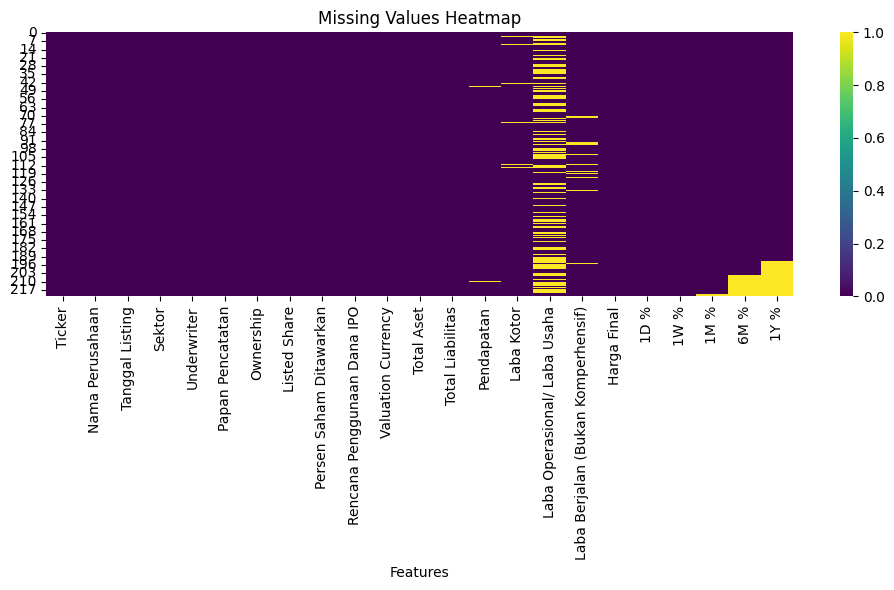

In [27]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.isna(), cmap='viridis')
plt.title('Missing Values Heatmap')
plt.xlabel('Features')
plt.tight_layout()
plt.show()

In [72]:
# ubah dulu yang object2

# Persen Saham Ditawarkan
df['Persen Saham Ditawarkan'] = df['Persen Saham Ditawarkan'].str.replace(',', '.', regex=False).astype(float)

In [73]:
# Semua yang dalam btk persen diganti ke float
cols_to_convert = ['1D %', '1W %', '1M %', '6M %', '1Y %']

# Convert: remove %, divide by 100, convert to float
df[cols_to_convert] = df[cols_to_convert].replace('%', '', regex=True).astype(float) / 100

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 223 entries, 0 to 222
Data columns (total 23 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Ticker                              223 non-null    object 
 1   Nama Perusahaan                     223 non-null    object 
 2   Tanggal Listing                     223 non-null    object 
 3   Sektor                              223 non-null    object 
 4   Underwriter                         223 non-null    object 
 5   Papan Pencatatan                    223 non-null    object 
 6   Ownership                           223 non-null    object 
 7   Listed Share                        223 non-null    int64  
 8   Persen Saham Ditawarkan             223 non-null    float64
 9   Rencana Penggunaan Dana IPO         223 non-null    object 
 10  Valuation Currency                  223 non-null    object 
 11  Total Aset                          223 non-n

- Impute using MICE Approach

In [31]:
# from sklearn.experimental import enable_iterative_imputer
# from sklearn.impute import IterativeImputer

# imputer = IterativeImputer(random_state=42, max_iter=100)

# df_train = df.loc[:,['Listed Share',
#                      'Persen Saham Ditawarkan',
#                      'Total Aset',
#                      'Total Liabilitas',
#                      'Pendapatan',
#                      'Laba Kotor',
#                      'Laba Operasional/ Laba Usaha',
#                      'Laba Berjalan (Bukan Komperhensif)',
#                      'Harga Final']]

# # train imputer
# imputer.fit(df_train)

# # transform the data
# df_imputed = imputer.transform(df_train)

# # put the data into the dataframe
# df.loc[:,['Listed Share',
#                      'Persen Saham Ditawarkan',
#                      'Total Aset',
#                      'Total Liabilitas',
#                      'Pendapatan',
#                      'Laba Kotor',
#                      'Laba Operasional/ Laba Usaha',
#                      'Laba Berjalan (Bukan Komperhensif)',
#                      'Harga Final']] = df_imputed

# df.info()

##### Data Preprocessing

- Tanggal (ubah jadi 3 kolom)

In [75]:
df['Tanggal Listing'] = pd.to_datetime(df['Tanggal Listing'])
df['Tahun Listing'] = df['Tanggal Listing'].dt.year
df['Bulan Listing'] = df['Tanggal Listing'].dt.month
df['Hari Listing'] = df['Tanggal Listing'].dt.day
df = df.drop('Tanggal Listing', axis=1)

- Hapus kolom yang tidak relevan

In [57]:
df = df.drop(['Ticker', 'Nama Perusahaan'], axis=1)

- Encoding

In [76]:
from sklearn.preprocessing import LabelEncoder

cat_columns = df.select_dtypes(include='object')

# categorical_cols = df.select_dtypes(include=['object']).columns
for col in cat_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

In [59]:
# from sklearn.preprocessing import MultiLabelBinarizer
# df['Underwriter_list'] = df['Underwriter'].str.split(';')

# # Step 2: encode using MultiLabelBinarizer
# mlb = MultiLabelBinarizer()
# underwriter_encoded = pd.DataFrame(mlb.fit_transform(df['Underwriter_list']), columns=mlb.classes_)

# # Step 3: join back to df
# df = pd.concat([df, underwriter_encoded], axis=1)


##### Features Engineering

In [77]:
df_clean = df.copy()
epsilon = 1e-6

df_clean['Total Equity'] = df_clean['Total Aset'] - df_clean['Total Liabilitas']
df_clean['EPS'] = df_clean['Laba Berjalan (Bukan Komperhensif)'] / (df_clean['Listed Share'] + epsilon)
df_clean['Revenue per Share'] = df_clean['Pendapatan'] / (df_clean['Listed Share'] + epsilon)
df_clean['Solvency'] = df_clean['Total Liabilitas'] / (df_clean['Total Aset'] + epsilon)
df_clean['ROA'] = df_clean['Laba Berjalan (Bukan Komperhensif)'] / (df_clean['Total Aset'] + epsilon)
df_clean['ROE'] = df_clean['Laba Berjalan (Bukan Komperhensif)'] / (df_clean['Total Equity'] + epsilon)
df_clean['Gross Profit Margin'] = (df_clean['Laba Kotor'] / (df_clean['Pendapatan'] + epsilon)) * 100
df_clean['Operating Profit Margin'] = (df_clean['Laba Operasional/ Laba Usaha'] / (df_clean['Pendapatan'] + epsilon)) * 100
df_clean['Net Profit Margin'] = (df_clean['Laba Berjalan (Bukan Komperhensif)'] / (df_clean['Pendapatan'] + epsilon)) * 100

df_clean.replace([np.inf, -np.inf], 0, inplace=True)
# df_clean.fillna(0, inplace=True)

In [61]:
df_clean.isna().sum().sort_values(ascending=False)

,0
Operating Profit Margin,87
Laba Operasional/ Laba Usaha,86
1Y %,30
6M %,18
Net Profit Margin,12
...,...
PT UOB Kay Hian Sekuritas,0
PT Trimegah Sekuritas Indonesia Tbk,0
PT Surya Fajar Sekuritas,0
PT Sucor Sekuritas,0


### Modelling

In [ ]:
# set categorical growth for '1D %', '1W %', '1M %', '6M %', '1Y %'
# 0-20%
# > 20% until 40%
# > 40% until 60%
# > 60% until 80%
# > 80% until 100%
# > 100%

# -20% until < 0%
# -40% until < -20%
# -60% until < -40%
# -80% until < -60%
# -100% until < -80%
# <-100%

In [78]:
import numpy as np
import pandas as pd

# create the categorical label and replace the value

bins = [-np.inf, -1.0, -0.8, -0.6, -0.4, -0.2, 0.0, 0.2, 0.4, 0.6, 0.8, 1.0, np.inf]

labels = [
    'Severe Loss',
    'Very Large Loss',
    'Large Loss',
    'Moderate Loss',
    'Small Loss',
    'Minor Loss',
    'Minor Growth',
    'Small Growth',
    'Moderate Growth',
    'Large Growth',
    'Very Large Growth',
    'Exceptional Growth'
]

growth_columns = ['1D %', '1W %', '1M %', '6M %', '1Y %']

for col in growth_columns:
    df_clean[col + '_class'] = pd.cut(df_clean[col], bins=bins, labels=labels)


In [79]:
# remove ['1D %', '1W %', '1M %', '6M %', '1Y %']
df_clean = df_clean.drop(['1D %', '1W %', '1M %', '6M %', '1Y %'], axis=1)

In [64]:
df_clean.isna().sum().sort_values(ascending=False)

,0
Operating Profit Margin,87
Laba Operasional/ Laba Usaha,86
1Y %_class,30
6M %_class,18
Net Profit Margin,12
...,...
Total Equity,0
Solvency,0
PT Victoria Sekuritas Indonesia,0
1D %_class,0


In [80]:
# mapping to numeric val

map_class = {
    'Severe Loss': 0,
    'Very Large Loss': 1,
    'Large Loss': 2,
    'Moderate Loss': 3,
    'Small Loss': 4,
    'Minor Loss': 5,
    'Minor Growth': 6,
    'Small Growth': 7,
    'Moderate Growth': 8,
    'Large Growth': 9,
    'Very Large Growth': 10,
    'Exceptional Growth': 11
}

class_columns = ['1D %_class', '1W %_class', '1M %_class', '6M %_class', '1Y %_class']
for col in class_columns:
    df_clean[col] = df_clean[col].map(map_class)

In [48]:
df_clean.isna().sum().sort_values(ascending=False)

,0
Sektor,0
Underwriter,0
Papan Pencatatan,0
Ownership,0
Listed Share,0
...,...
1D %_class,0
1W %_class,0
1M %_class,0
6M %_class,0


In [66]:
pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 7.5 MB/s eta 0:00:00


In [83]:
# target col is 1Y %_class
# drop the rows that have NA's value in target col
# split 80:20, use catboost (ignore NA's value in other col)
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

cat_features = ['1D %_class', '1W %_class', '1M %_class', '6M %_class']

# Define your target column
target_column = '1Y %_class'

# Drop rows where **target is NA**
df_model = df_clean.dropna(subset=[target_column])

# Define features (X) and target (y)
X = df_model.drop(columns=[target_column])
y = df_model[target_column]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize CatBoostClassifier → handles missing values and categorical features automatically
model = CatBoostClassifier(verbose=0, random_state=42)

# Train the model
model.fit(X_train, y_train, cat_features=cat_features)

# Predict and evaluate
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.46153846153846156
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         1
           2       0.33      0.25      0.29         4
           3       0.67      0.86      0.75         7
           4       0.27      0.75      0.40         4
           5       0.00      0.00      0.00         6
           6       0.33      0.17      0.22         6
           7       0.33      1.00      0.50         1
           8       0.33      0.50      0.40         2
           9       0.00      0.00      0.00         2
          11       1.00      0.83      0.91         6

    accuracy                           0.46        39
   macro avg       0.33      0.44      0.35        39
weighted avg       0.41      0.46      0.41        39



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


punyaku sampe sini ya :))

In [ ]:
# from sklearn.model_selection import train_test_split

# X = df_clean.drop(columns=['Harga Final', '1D %', '1W %', '1M %', '6M %', '1Y %'], axis=1)
# y = df_clean['Harga Final']

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

- Menerapkan IsolationForest untuk Outlier Deletion

In [ ]:
from sklearn.ensemble import IsolationForest

iso_forest = IsolationForest(n_estimators=100, contamination=0.1, random_state=42)

iso_forest.fit(X_train)

IsolationForest(contamination=0.1, random_state=42)

In [ ]:
train_outlier_preds = iso_forest.predict(X_train)
test_outlier_preds = iso_forest.predict(X_test)

X_train_before = len(X_train)
X_test_before = len(X_test)

X_train = X_train[train_outlier_preds == 1]
y_train = y_train[train_outlier_preds == 1]

X_test = X_test[test_outlier_preds == 1]
y_test = y_test[test_outlier_preds == 1]

print(f"Data Latih: {X_train_before - len(X_train)} outlier dihapus. Sisa: {len(X_train)} baris.")
print(f"Data Uji: {X_test_before - len(X_test)} outlier dihapus. Sisa: {len(X_test)} baris.")

Data Latih: 18 outlier dihapus. Sisa: 160 baris.
Data Uji: 5 outlier dihapus. Sisa: 40 baris.


- Training

In [ ]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=100, random_state=42)

model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
from sklearn.metrics import mean_absolute_error, r2_score, root_mean_squared_error, mean_absolute_percentage_error

y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)

print(f"R^2: {r2:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")
print(f"MAPE: {mape:.4f}")

R^2: 0.2520
RMSE: 220.9312
MAE: 130.0310
MAPE: 0.5150


### LIME

In [ ]:
import lime
import lime.lime_tabular

explainer = lime.lime_tabular.LimeTabularExplainer(
    training_data=X_train.values,
    feature_names=X_train.columns.tolist(),
    class_names=['Harga Final'],
    mode='regression'
)

instance_to_explain = X_test.iloc[0]
explanation = explainer.explain_instance(
    data_row=instance_to_explain,
    predict_fn=model.predict,
    num_features=10
)

explanation.save_to_file('../lime/lime_explanation.html')

d:\Conda\Lib\site-packages\lime\discretize.py:110: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ret[feature] = int(self.lambdas[feature](ret[feature]))
d:\Conda\Lib\site-packages\lime\discretize.py:110: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  ret[feature] = int(self.lambdas[feature](ret[feature]))
d:\Conda\Lib\site-packages\lime\lime_tabular.py:544: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  binary_column = (inverse_c